In [1]:
import matplotlib.pyplot as plt
import os
import csv
import pandas as pd
import numpy as np
from collections import defaultdict

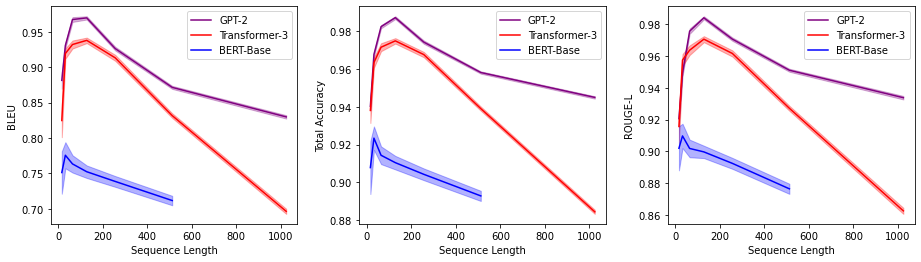

" \nproduce_grid(methods=['decepticon', 'tag'], metrics=['bleu', 'accuracy', 'rougeL'], titles=['', '', ''],\n             seq_len=[32], bs=[2, 3, 4, 8, 16, 32], models=['trafo3'], \n             path='/Users/liamfowl/Desktop/new_data/outputs', save='')\n"

In [11]:
def get_stats(path='~/breaching/tables', method='decepticon', model='trafo3', seq_len=32, bs=1, metric='accuracy', gelu=False):
    def get_path():
        nonlocal seq_len
        if seq_len < 10:
            seq_len = '0'+str(seq_len)
        if not gelu:
            partial_path = os.path.join(path, f'{method}_{model}_{seq_len}_{bs}')
        else:
            partial_path = os.path.join(path, f'{method}_{model}_gelu_{seq_len}_{bs}')
        
        if f'{method}_{model}_{seq_len}_{bs}' not in os.listdir(path):
            return None
        
        for subdir in reversed(sorted(os.listdir(partial_path))):
            for folder in reversed(sorted(os.listdir(os.path.join(partial_path, subdir)))):
                for run in os.listdir(os.path.join(partial_path, subdir, folder)):
                    if run == 'tables':
                        if len(os.listdir(os.path.join(partial_path, subdir, folder, run))) == 0:
                            continue
                        for tab in os.listdir(os.path.join(partial_path, subdir, folder, run)):
                            return os.path.join(partial_path, subdir, folder, run, tab)
    
    path_to_table = get_path()
    if path_to_table is None:
        return None, None
    path_to_table = r'{}'.format(path_to_table)
    data = pd.read_csv(path_to_table, sep='\t')
    return data[metric].mean(), data[metric].std()/np.sqrt(len(data[metric]))

def produce_plot(ax, methods, seq_len, bs, models, metric='accuracy', path='~/breaching/tables', gelu=False, title=''):
    results = defaultdict(list)
    errors = defaultdict(list)
    model_dict = dict([('gpt_sanity', 'GPT-2'), ('bert_sanity', 'BERT-Base'), ('trafo3', 'Transformer-3'), 
                       ('gpt_base', 'GPT-2 (GeLU)'), ('bert_base', 'BERT-Base (GeLU)')])
    method_dict = dict([('tag', 'TAG'), ('decepticon', "Ours")])
    metric_dict = dict([('accuracy', 'Total Accuracy'), ('bleu', 'BLEU'), ('rougeL', 'ROUGE-L')])
    
    _, concern = sorted([(len(methods), 'method'), (len(models), 'model')])[-1]     
    
    for method in methods:
        for l in seq_len:
            for sz in bs:
                for model in models:
                    mean, std = get_stats(path, method, model, l, sz, metric, gelu)
                    if mean is not None:
                        if concern == 'model':
                            results[model].append(mean)
                            errors[model].append(std)
                        else:
                            results[method].append(mean)
                            errors[method].append(std)
                                            

    _, name, axis = sorted([(len(seq_len), 'Sequence Length', seq_len), (len(bs), 'Batch Size', bs)])[-1]           
    colors = ['purple','r', 'b', 'y', 'orange']
    colors = iter(colors)
                    
    if concern == 'model':
        for model in models:
            c = next(colors)
            ax.plot(axis[:len(results[model])], results[model], c, label=model_dict[model])
            ax.fill_between(axis[:len(results[model])], [r - e for (r,e) in zip(results[model], errors[model])], 
                             [r + e for (r,e) in zip(results[model], errors[model])], alpha=0.3, color=c)
    else:
        for method in methods:
            c = next(colors)
            ax.plot(axis[:len(results[method])], results[method], c, label=method_dict[method])
            ax.fill_between(axis[:len(results[method])], [r - e for (r,e) in zip(results[method], errors[method])], 
                             [r + e for (r,e) in zip(results[method], errors[method])], alpha=0.3, color=c)
    
    
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    ax.set_xlabel(name)
    ax.set_ylabel(metric_dict[metric])
    ax.legend()
    if title != '':
        ax.set_title(title)

    

def produce_grid(methods, metrics, titles, seq_len, bs, models, path, save=''):   
    fig, axs = plt.subplots(1, len(metrics))
    for metric, ax, title in zip(metrics, axs, titles):
        produce_plot(ax=ax, methods=methods, seq_len=seq_len, bs=bs, models=models, metric=metric, path=path, title=title)
    
    plt.subplots_adjust(left=0, right=2, hspace=20.0, wspace=0.25)
    if save == '':
        plt.show()
    else:
        plt.savefig(save)


produce_grid(methods=['decepticon'], metrics=['bleu', 'accuracy', 'rougeL'], titles=['', '', ''],
             seq_len=[16, 32, 64, 128, 256, 512, 1024], bs=[1], models=['gpt_sanity', 'trafo3', 'bert_sanity'], 
             path='/Users/liamfowl/Desktop/jan26_data/outputs', save='')
''' 
produce_grid(methods=['decepticon', 'tag'], metrics=['bleu', 'accuracy', 'rougeL'], titles=['', '', ''],
             seq_len=[32], bs=[2, 3, 4, 8, 16, 32], models=['trafo3'], 
             path='/Users/liamfowl/Desktop/new_data/outputs', save='')
''' 

     

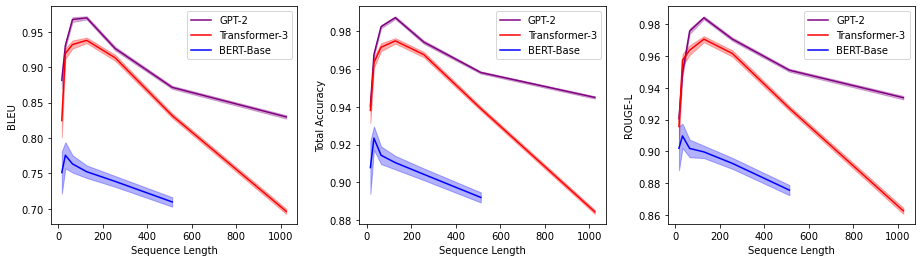

In [12]:
produce_grid(methods=['decepticon'], metrics=['bleu', 'accuracy', 'rougeL'], titles=['', '', ''],
             seq_len=[16, 32, 64, 128, 256, 512, 1024], bs=[1], models=['gpt_sanity', 'trafo3', 'bert_sanity'], 
             path='/Users/liamfowl/Desktop/new_data/outputs', save='')